
**Análisis y Visualización de Datos** 

**Laboratorio 1**

**Carga de Datos**

In [7]:
# Importamos los módulos a utilizar
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [8]:

# Leemos el dataset
data = pd.read_csv('./Laboratorio1/responses.csv')
data.describe()

Music  Slow songs or fast songs        Dance         Folk  \
count  1007.000000               1008.000000  1006.000000  1005.000000   
mean      4.731877                  3.328373     3.113320     2.288557   
std       0.664049                  0.833931     1.170568     1.138916   
min       1.000000                  1.000000     1.000000     1.000000   
25%       5.000000                  3.000000     2.000000     1.000000   
50%       5.000000                  3.000000     3.000000     2.000000   
75%       5.000000                  4.000000     4.000000     3.000000   
max       5.000000                  5.000000     5.000000     5.000000   

           Country  Classical music      Musical          Pop         Rock  \
count  1005.000000      1003.000000  1008.000000  1007.000000  1004.000000   
mean      2.123383         2.956132     2.761905     3.471698     3.761952   
std       1.076136         1.252570     1.260845     1.161400     1.184861   
min       1.000000         1.000000     1.000000     1.000000     1.000000   
25%       1.000000         2.000000     2.000000     3.000000     3.000000   
50%       2.000000         3.000000     3.000000     4.000000     4.000000   
75%       3.000000         4.000000     4.000000     4.000000     5.000000   
max       5.000000         5.000000     5.000000     5.000000     5.000000   

       Metal or Hardrock         ...          Shopping centres  \
count        1007.000000         ...               1008.000000   
mean            2.361470         ...                  3.234127   
std             1.372995         ...                  1.323062   
min             1.000000         ...                  1.000000   
25%             1.000000         ...                  2.000000   
50%             2.000000         ...                  3.000000   
75%             3.000000         ...                  4.000000   
max             5.000000         ...                  5.000000   

       Branded clothing  Entertainment spending  Spending on looks  \
count       1008.000000             1007.000000        1007.000000   
mean           3.050595                3.201589           3.106256   
std            1.306321                1.188947           1.205368   
min            1.000000                1.000000           1.000000   
25%            2.000000                2.000000           2.000000   
50%            3.000000                3.000000           3.000000   
75%            4.000000                4.000000           4.000000   
max            5.000000                5.000000           5.000000   

       Spending on gadgets  Spending on healthy eating          Age  \
count          1010.000000                  1008.00000  1003.000000   
mean              2.870297                     3.55754    20.433699   
std               1.284970                     1.09375     2.828840   
min               1.000000                     1.00000    15.000000   
25%               2.000000                     3.00000    19.000000   
50%               3.000000                     4.00000    20.000000   
75%               4.000000                     4.00000    22.000000   
max               5.000000                     5.00000    30.000000   

           Height      Weight  Number of siblings  
count  990.000000  990.000000         1004.000000  
mean   173.514141   66.405051            1.297809  
std     10.024505   13.839561            1.013348  
min     62.000000   41.000000            0.000000  
25%    167.000000   55.000000            1.000000  
50%    173.000000   64.000000            1.000000  
75%    180.000000   75.000000            2.000000  
max    203.000000  165.000000           10.000000  

[8 rows x 139 columns]

**Estadísticas Descriptivas**

**Media, Mediana, Moda, Desviación Estándar**

In [9]:
# Calculamos media, mediana, moda y desviación estándar del Peso

pmedia = data.Weight.mean()
pmediana = data.Weight.median()
pmoda = data.loc[:,'Weight'].mode()[0]
pstd = data.Weight.std()

print('Estadísticas de la variable Peso: ')
print('Media: ',pmedia)
print('Mediana: ',pmediana)
print('Moda: ', pmoda)
print('Desviación Estándar: ',pstd)

Estadísticas de la variable Peso: 
Media:  66.40505050505051
Mediana:  64.0
Moda:  60.0
Desviación Estándar:  13.83956078119004


In [10]:
# Calculamos media, mediana, moda y desviación estándar de la Edad

emedia = data.Age.mean()
emediana = data.Age.median()
emoda = data.loc[:,'Age'].mode()[0]
estd = data.Age.std()

print('Estadísticas de la variable Peso: ')
print('Media: ',emedia)
print('Mediana: ',emediana)
print('Moda: ', emoda)
print('Desviación Estándar: ',estd)

Estadísticas de la variable Peso: 
Media:  20.43369890329013
Mediana:  20.0
Moda:  19.0
Desviación Estándar:  2.828840098778979


In [11]:
data.Age.hist()

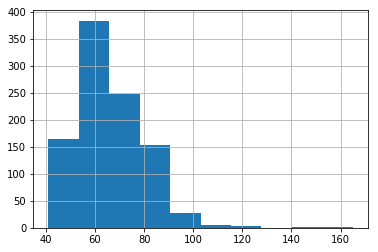

In [12]:

data.Weight.hist()

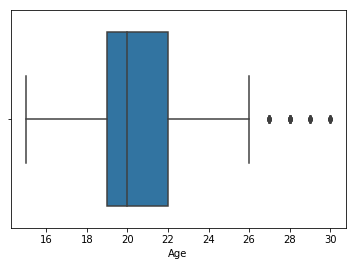

In [13]:
# Procedemos a analizar Outliers en los datos
ax = sns.boxplot(x=data["Age"])

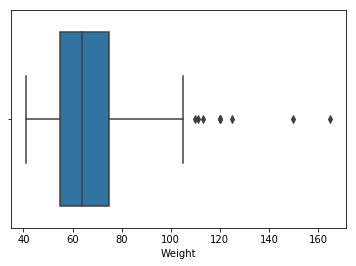

In [14]:

ax = sns.boxplot(x=data["Weight"])

**Outliers**

Podemos observar que ambas columnas tienen datos que se encuentran muy lejos del centro. Usaremos la definición de outlier estándar utilizada por Seaborn en base al rango intercuartil (y que representan los puntos en los gráficos):

Valor inferior = Q1 - IQR 1.5 Valor superior = Q3 + IQR 1.5

Si quitamos estos outliers podemos ver que la distribución se normaliza

55.0 75.0
20.0


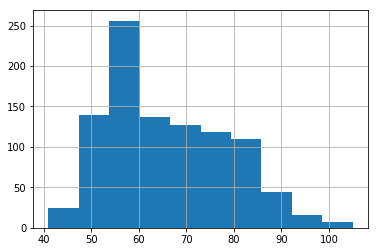

In [15]:
q1 = data['Weight'].quantile(.25)
q3 = data['Weight'].quantile(.75)

print(q1,q3)

iqr = q3 - q1
print(iqr)
mask = data['Weight'].between((q1-iqr*1.5), (q3+iqr*1.5), inclusive=True)

data_sin_o = data.loc[mask, 'Weight']
data_sin_o.hist()

19.0 22.0 3.0


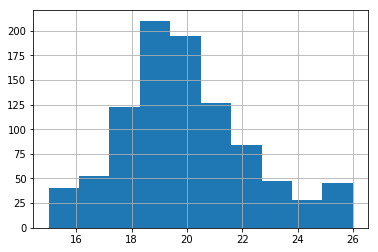

In [16]:
q1 = data['Age'].quantile(.25)
q3 = data['Age'].quantile(.75)
iqr = q3 - q1
print(q1,q3,iqr)
mask = data['Age'].between((q1-iqr*1.5), (q3+iqr*1.5), inclusive=True)
data_sin_o = data.loc[mask, 'Age']
data_sin_o.hist()

**Análisis de Variables agrupadas por Género**

Visualizacion de Peso y Edad por Sexo

In [17]:
fig, axes = plt.subplots(1, 2)


axes[0].set_title('Peso')
axes[1].set_title('Edad')


f = data[data['Gender'] == 'female']
f.Weight.hist(ax=axes[0])

m = data[data['Gender'] == 'male']
m.Weight.hist(ax=axes[0],figsize=(15,5))

f = data[data['Gender'] == 'female']
f.Age.hist(ax=axes[1])

m = data[data['Gender'] == 'male']
m.Age.hist(ax=axes[1],figsize=(15,5))

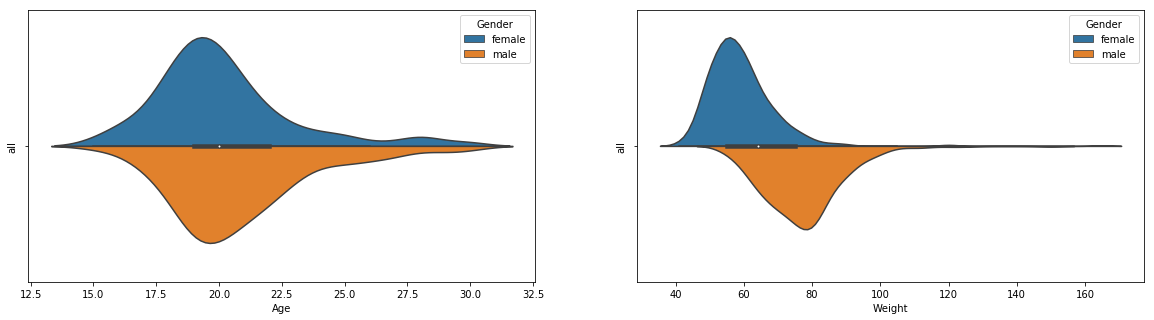

In [18]:
data['all'] =  ''

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
data2 = data.dropna(subset=['Age'])
_ = sns.violinplot(x='Age',  y = "all",hue='Gender',  data=data2, split=True, ax = ax[0])
data2 = data.dropna(subset=['Weight'])
_ = sns.violinplot(x='Weight', y = "all", hue='Gender', data=data2, split=True, ax = ax[1])

**¿Responden a alguna distribución conocida? Es una distribución normal.**

Comparar cualitativamente y gráficamente ambas distribuciones: La distribución de peso en las mujeres es menor a la de los hombres. La distribución de edades en el dataset es prácticamente idéntica para ambos géneros.

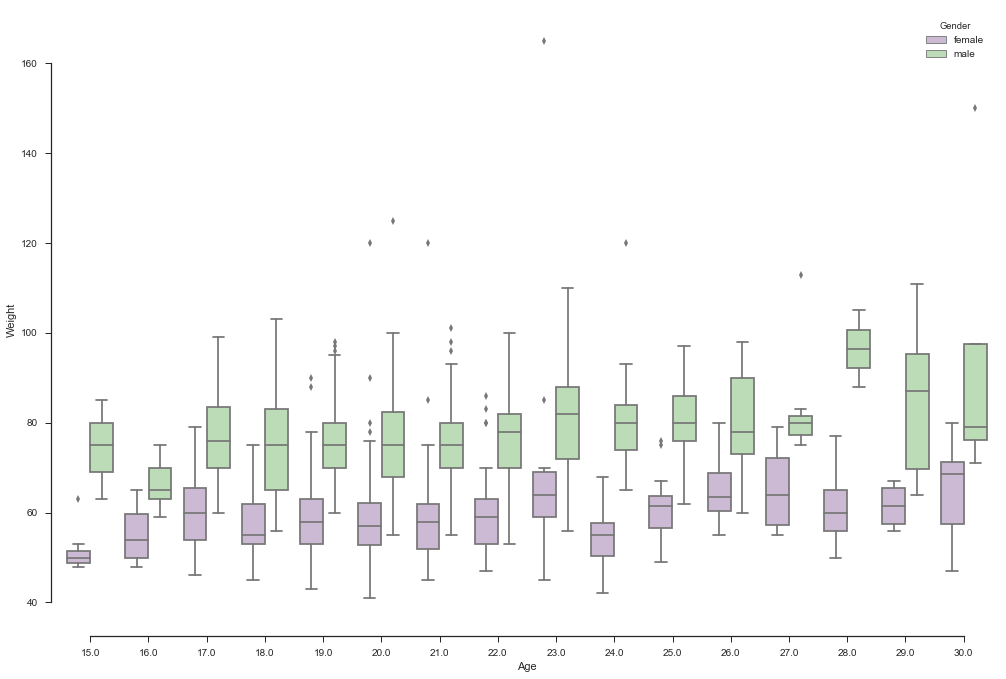

In [19]:
sns.set(style="ticks")
fig, ax = plt.subplots()
# Load the example tips dataset
fig.set_size_inches(16.7,11.27)
# 
sns.boxplot(x="Age", y="Weight", hue="Gender", data=data, palette="PRGn",ax=ax)
sns.despine(offset=10, trim=True)

**Calcular la probabilidad marginal y conjunta, y la correlación entre otras dos variables, por ejemplo consumo de alcohol y tabaquismo.**

In [20]:
SmokingAlcohol_wMargin = pd.crosstab(index=data["Smoking"], columns=data["Alcohol"], margins=True, normalize=True)
display(SmokingAlcohol_wMargin)

Alcohol         drink a lot  never  social drinker    All
Smoking                                                  
current smoker        0.078  0.011           0.099  0.188
former smoker         0.055  0.011           0.109  0.175
never smoked          0.015  0.061           0.131  0.207
tried smoking         0.072  0.039           0.319  0.430
All                   0.220  0.122           0.658  1.000

In [ ]:
Entendemos que las variables "Tomador" y "Fumador" están relacionadas segun lo siguiente.
P(Tomador/Fumador) = P(Tomador n Fumador)
                     --------------------
                       P(Fumador)
P(Tomador)= 0.22
P(Fumador)=0.188
P(Tomador n Fumador)=0.078

P(Tomador/Fumador) = 0.078
                     ----- = 0,415 != 0.078 por lo tanto se asumen las variables relacionadas o dependientes.
                     0.188

P(Fumador/Tomador) = P(Fumador n Tomador)
                     --------------------
                       P(Tomador)
        
P(Fumador/Tomador) = 0.078
                     ----- = 0,354
                     0.22

**Representar visualmente la probabilidad conjunta entre los valores posibles de las variables elegidas.**

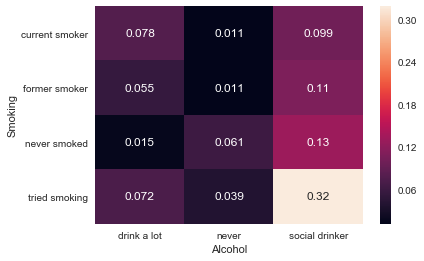

In [24]:
SmokingAlcohol_noMargin = pd.crosstab(index=data["Smoking"], columns=data["Alcohol"], margins=False, normalize=True)

sns.set()
sns.heatmap(SmokingAlcohol_noMargin, annot=True)

**¿Qué pasaría con los niveles de tabaquismo si se prohíbe fumar en los bares? **
 - Con los niveles de tabaquismo no pasaria nada. Con los niveles de consumo del alcohol se podría percibir una baja de hasta el 7,8%.

**¿Qué pasaría con la cantidad de consumidores de alcohol si disminuye la cantidad de fumadores que consumen alcohol?**
Se podría perder hasta un 7.8% de la clientela.